## Preprocess for 3D data


In [193]:
import h5py
import pathlib

def to_tuple_list(numpy_list):
    """Data imported with h5py is usually given as numpy array.
    This function transforms numpy arrays to tuple.

    Args:
        numpy_list (numpy.ndarray): lists of 3D positions as numpy array.

    Returns:
        list: lists of 3D positions as tuple.
    """
    return [tuple(entry) for entry in numpy_list]


def import_all_from_hdf5(
    file_path: pathlib.Path,
    group: str = "originals",
) -> list:
    """Imports all stored ball data from HDF5 file specified in given
    path argument from specified group.

    Args:
        group (str, optional): Nested group within HDF5 file.
        Defaults to "originals".
        file_path (pathlib.Path, optional): Path object specifying
        file location. Defaults to None.
    """

    # "r" specifies only read permissions
    file = h5py.File(file_path, "r")

    trajectory_data = []

    for index in list(file[group].keys()):
        launch_parameter = tuple(file[group][index]["launch_param"])
        time_stamps = list(file[group][index]["time_stamps"])
        positions = to_tuple_list(list(file[group][index]["positions"]))
        velocities = to_tuple_list(list(file[group][index]["velocities"]))

        trajectory_data.append([launch_parameter, time_stamps, positions, velocities])

    file.close()

    return trajectory_data

In [194]:
import pandas as pd
path = pathlib.Path("./MN5008_training_data/MN5008_grid_data_all.hdf5")
trajectory_data = import_all_from_hdf5(file_path=path)
df = pd.DataFrame(trajectory_data)

In [195]:
df

,0,1,2,3
0,"(0.3, 0.2, 1200.0, 1200.0, 1200.0)","[0.0, 0.005650176000000001, 0.0112757760000000...","[(1.1347458200188938, 0.1932058705711809, 1.05...","[(0.0, 0.0, 0.0), (3.9811509156283007, 0.50328..."
1,"(0.3, 0.2, 1300.0, 1300.0, 1300.0)","[0.0, 0.010420992, 0.016366848, 0.021490432, 0...","[(1.1815508515554267, 0.18897344458895185, 1.0...","[(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (4.82809282..."
2,"(0.4714285714285714, 0.8857142857142857, 1300....","[0.0, 0.005544960000000001, 0.011207168, 0.016...","[(1.6808270371613458, -0.011527961046927096, 1...","[(0.0, 0.0, 0.0), (3.9743428483067316, 0.11353..."
3,"(0.3, 0.4285714285714286, 1200.0, 1200.0, 1200.0)","[0.0, 0.004925952, 0.010543616, 0.01616896, 0....","[(0.9707535707321329, 0.1724035286211409, 1.19...","[(0.0, 0.0, 0.0), (4.7156781559083365, 0.96014..."
4,"(0.5, 0.4, 900.0, 900.0, 1083.3333333333333)","[0.0, 0.016790272000000002, 0.022262528, 0.027...","[(0.9518691169038687, -0.040734970457468045, 1...","[(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (3.80476826..."
...,...,...,...,...
3245,"(0.2, 0.4, 1450.0, 1266.6666666666667, 900.0)","[0.0, 0.0049807359999999995, 0.021749504, 0.02...","[(1.0093947832787857, 0.2731343772306169, 1.16...","[(-212.98249534057618, -37.6453060171711, -85...."
3246,"(0.2, 0.4, 1450.0, 1266.6666666666667, 1083.33...","[0.0, 0.005071872000000001, 0.010758912, 0.016...","[(1.3041578303473105, 0.33494740335035095, 1.1...","[(0.0, 0.0, 0.0), (4.293091201371211, 0.907923..."
3247,"(0.2, 0.4, 1450.0, 1450.0, 900.0)","[0.0, 0.005564928, 0.010827008, 0.016494848, 0...","[(1.041663894717051, 0.2973045277012269, 1.180...","[(0.0, 0.0, 0.0), (5.086491191746192, 0.959306..."
3248,"(0.5, 0.4, 900.0, 900.0, 900.0)","[0.0, 0.0110848, 0.016447488, 0.027041024, 0.0...","[(1.0597674815096059, -0.030611065825144067, 0...","[(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (2.96751455..."


In [196]:
import numpy as np
#dfo = df.iloc[0]
dfo = df
dfo = dfo[2]


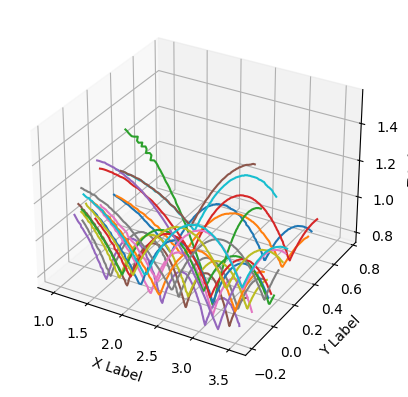

In [197]:
fig = plt.figure()  # Create a new figure
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot

for i in range(20):
    ax.plot([x for x, y, z in dfo[i]], [y for x, y, z in dfo[i]],  [z for x, y, z in dfo[i]])  # Plot the data

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [198]:
count = 10
df_save = df.iloc[:, [0, 2]]
df_save = df_save[:count]
df_save

,0,2
0,"(0.3, 0.2, 1200.0, 1200.0, 1200.0)","[(1.1347458200188938, 0.1932058705711809, 1.05..."
1,"(0.3, 0.2, 1300.0, 1300.0, 1300.0)","[(1.1815508515554267, 0.18897344458895185, 1.0..."
2,"(0.4714285714285714, 0.8857142857142857, 1300....","[(1.6808270371613458, -0.011527961046927096, 1..."
3,"(0.3, 0.4285714285714286, 1200.0, 1200.0, 1200.0)","[(0.9707535707321329, 0.1724035286211409, 1.19..."
4,"(0.5, 0.4, 900.0, 900.0, 1083.3333333333333)","[(0.9518691169038687, -0.040734970457468045, 1..."
5,"(0.5, 0.4, 900.0, 900.0, 1266.6666666666667)","[(1.0019504970822348, -0.03319784833417406, 1...."
6,"(0.5, 0.4, 900.0, 900.0, 1450.0)","[(1.222061406865289, -0.037719052968336074, 1...."
7,"(0.5, 0.4, 900.0, 1083.3333333333333, 900.0)","[(1.0396439612003205, -0.025144980280710057, 1..."
8,"(0.5, 0.4, 900.0, 1083.3333333333333, 1083.333...","[(1.0153559133539418, -0.019326112243709066, 1..."
9,"(0.2, 0.4, 900.0, 1083.3333333333333, 1266.666...","[(0.9929636421759986, 0.29841390106024895, 1.1..."


In [199]:
import pandas as pd

# Suppose this is your data
data = df_save

# Initiate an empty DataFrame
dfx = pd.DataFrame()

# Loop through each item in the data
for index,item in data.iterrows():
    td = [[x, y, z] for x, y, z in item[2]]
    temp_df = pd.DataFrame(td, columns=['position_x','position_y', 'position_z' ])
    temp_df['time'] = temp_df.index
    temp_df['state'] = [item[0]] * len(temp_df)
    dfx = pd.concat([dfx, temp_df], axis = 0)


# Reset index
dfx = dfx.reset_index(drop=True)

# Assign a unique number to each unique type
type_mark = {type_: i for i, type_ in enumerate(dfx['state'].unique())}
dfx['type_mark'] = dfx['state'].map(type_mark)

# Print the DataFrame
dfx


,position_x,position_y,position_z,time,state,type_mark
0,1.134746,0.193206,1.056762,0,"(0.3, 0.2, 1200.0, 1200.0, 1200.0)",0
1,1.157240,0.196050,1.049933,1,"(0.3, 0.2, 1200.0, 1200.0, 1200.0)",0
2,1.182493,0.199429,1.043460,2,"(0.3, 0.2, 1200.0, 1200.0, 1200.0)",0
3,1.207376,0.203713,1.036123,3,"(0.3, 0.2, 1200.0, 1200.0, 1200.0)",0
4,1.232807,0.206230,1.029714,4,"(0.3, 0.2, 1200.0, 1200.0, 1200.0)",0
...,...,...,...,...,...,...
1820,2.608523,0.748811,0.952485,105,"(0.2, 0.4, 900.0, 1083.3333333333333, 1266.666...",9
1821,2.615755,0.752078,0.941716,106,"(0.2, 0.4, 900.0, 1083.3333333333333, 1266.666...",9
1822,2.628468,0.754423,0.933988,107,"(0.2, 0.4, 900.0, 1083.3333333333333, 1266.666...",9
1823,2.637258,0.758086,0.925852,108,"(0.2, 0.4, 900.0, 1083.3333333333333, 1266.666...",9


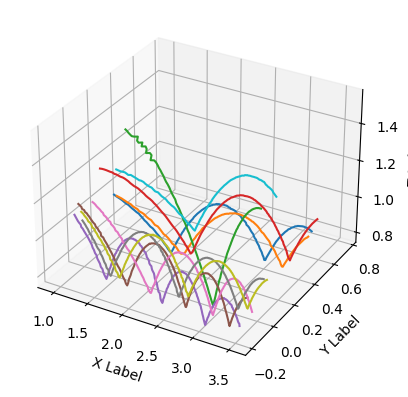

In [200]:
fig = plt.figure()  # Create a new figure
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot


for i in range(count):
    tm = dfx[dfx['type_mark'] == i]
    ax.plot(tm["position_x"],tm["position_y"], tm["position_z"])  # Plot the data

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [201]:
dfx.to_json('track.json', orient='records')